<a href="https://colab.research.google.com/github/JoeOlang/NLP/blob/main/Text%20Classification/To%20Vaccinate/v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy

import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zindi/To Vaccinate/Train.csv").dropna()
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Zindi/To Vaccinate/Test.csv").dropna()


# Creating the input for the pipeline
X_train = train['safe_text'].tolist()
Y_train = train['label'].tolist()

X_test = test['safe_text'].tolist()


In [12]:
train.shape

(9999, 4)

In [8]:
train.groupby(['label'], as_index=False).count()

,label,tweet_id,safe_text,agreement
0,-1.0,1038,1038,1038
1,0.0,4908,4908,4908
2,1.0,4053,4053,4053


In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

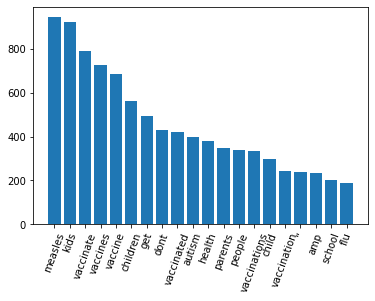

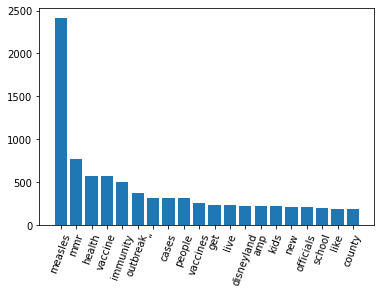

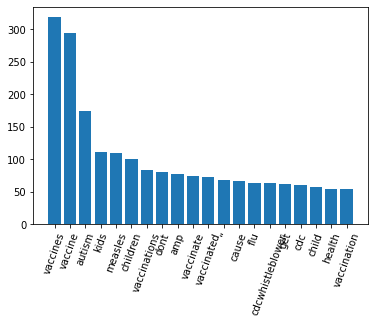

In [19]:
# Counting the number of words
from collections import Counter
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')


# Plotting functions
import matplotlib.pyplot as plt
X_train = [clean_text(text) for text in X_train]
Y_train = np.asarray(Y_train)

# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Getting the most frequent words
d1 = train.loc[train['label']==1, 'safe_text'].tolist()
d0 = train.loc[train['label']==0, 'safe_text'].tolist()
dn1 = train.loc[train['label']==-1, 'safe_text'].tolist()

d1 = [clean_text(x, stop_words=stop_words) for x in d1]
d0 = [clean_text(x, stop_words=stop_words) for x in d0]
dn1 = [clean_text(x, stop_words=stop_words) for x in dn1]

d1_text = ' '.join(d1).split()
d0_text = ' '.join(d0).split()
dn1_text = ' '.join(dn1).split()

topd1 = Counter(d1_text)
topd0 = Counter(d0_text)
topn1 = Counter(dn1_text)

topd1 = topd1.most_common(20)
topd0 = topd0.most_common(20)
topn1 = topn1.most_common(20)


plt.bar(range(len(topd1)), [val[1] for val in topd1], align='center')
plt.xticks(range(len(topd1)), [val[0] for val in topd1])
plt.xticks(rotation=70)
plt.show()

plt.bar(range(len(topd0)), [val[1] for val in topd0], align='center')
plt.xticks(range(len(topd0)), [val[0] for val in topd0])
plt.xticks(rotation=70)
plt.show()

plt.bar(range(len(topn1)), [val[1] for val in topn1], align='center')
plt.xticks(range(len(topn1)), [val[0] for val in topn1])
plt.xticks(rotation=70)
plt.show()
